In [1]:
import pandas as pd

In [3]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [4]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [5]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [9]:
s2[1]

83

In [8]:
s2['bob']

83

In [10]:
s2.iloc[1]

83

In [11]:
s2.loc['bob']

83

In [12]:
s2.bob

83

## Init from dict

In [14]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [15]:
s4 = pd.Series(weights, index = ['colin', 'alice'])
s4

colin    86
alice    68
dtype: int64

In [23]:
s2.keys()

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')

In [19]:
s2.value_counts()

68     2
83     1
112    1
dtype: int64

In [21]:
s2.values

array([ 68,  83, 112,  68], dtype=int64)

## Plotting a Series

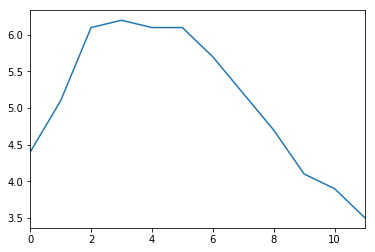

In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()

## Handling time

In [27]:
dates = pd.date_range('2016/10/29 5:30pm',periods = 12, freq = 'H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [30]:
temp_series = pd.Series(temperatures, index = dates)

In [31]:
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

(0, 10)

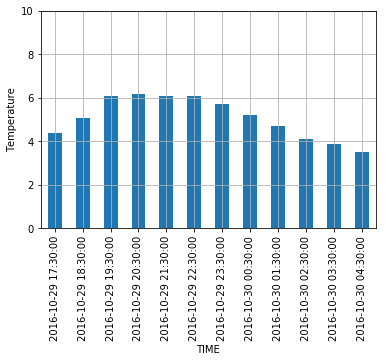

In [35]:
temp_series.plot(kind = 'bar')
plt.grid(True)
plt.xlabel('TIME')
plt.ylabel('Temperature')
plt.ylim(0,10)

## Resampling

In [36]:
temp_series_freq_2H = temp_series.resample("2H")

In [38]:
temp_series_freq_2H = temp_series_freq_2H.mean()

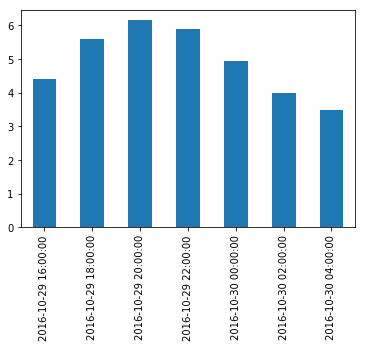

In [39]:
temp_series_freq_2H.plot(kind = 'bar')

## Upsampling and interpolation

In [40]:
temp_series_freq_15min = temp_series.resample('15Min').mean()
temp_series_freq_15min.head()

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
Freq: 15T, dtype: float64

In [42]:
temp_series_freq_15min = temp_series_freq_15min.resample('15Min').interpolate(method = 'cubic')
temp_series_freq_15min.head(10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

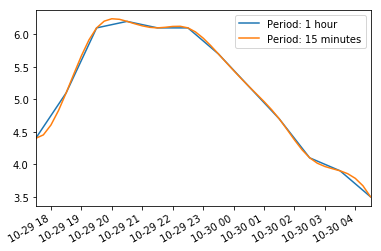

In [43]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()

## `DataFrame` objects

In [44]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [46]:
people['birthyear']

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [50]:
people[['birthyear','hobby']]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [51]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [52]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [53]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
London charles       1992      NaN     112       0.0
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0

In [54]:
d6 = d5.T
d6

London   Paris         
          charles   alice      bob
birthyear    1992    1985     1984
hobby         NaN  Biking  Dancing
weight        112      68       83
children        0     NaN        3

In [55]:
people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [56]:
people[np.array([True, False, True])]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1992,0.0,NaN


In [57]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [58]:
people[people.birthyear < 1990]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


In [59]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True
charles,112,NaN,26,False


In [63]:
people.query("age > 30")

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True


## Combining DataFrames

In [64]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [65]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [66]:
pd.merge(left = city_loc, right = city_pop, on = 'city')

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [67]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


In [68]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


In [69]:
result_concat = pd.concat([city_loc,city_pop])
result_concat

c:\users\wei\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas
